In [2]:
import math
import operator
from pathlib import Path

from ipywidgets import fixed, interact
import ipywidgets as widgets
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import describe, gaussian_kde
import seaborn as sns

from DET import DET

mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

/Users/johalexander/DTU/Repositories/02238-FAE/venv/lib/python3.10/site-packages/matplotlib2tikz/__init__.py:31: UserWarning: matplotlib2tikz has been renamed to tikzplotlib (which is Python-3-only). matplotlib2tikz will no longer be supported.
  warnings.warn("matplotlib2tikz has been renamed to tikzplotlib (which is Python-3-only). matplotlib2tikz will no longer be supported.")


## Load scores
In this example, scores are conveniently stored in npy files and divided into mated and non-mated ones.

In [3]:
system_name1 = "original"
mated_score_file1 = f"dataset/{system_name1}_mated.npy"
nonmated_score_file1 = f"dataset/{system_name1}_non_mated.npy"
mated_scores1 = np.load(mated_score_file1)
nonmated_scores1 = np.load(nonmated_score_file1)
scores_type1 = "similarity"

system_name2 = "blur"
mated_score_file2 = f"dataset/{system_name2}_mated.npy"
nonmated_score_file2 = f"dataset/{system_name2}_non_mated.npy"
mated_scores2 = np.load(mated_score_file2)
nonmated_scores2 = np.load(nonmated_score_file2)
scores_type2 = "similarity"

system_name3 = "gaussian"
mated_score_file3 = f"dataset/{system_name3}_mated.npy"
nonmated_score_file3 = f"dataset/{system_name3}_non_mated.npy"
mated_scores3 = np.load(mated_score_file3)
nonmated_scores3 = np.load(nonmated_score_file3)
scores_type3 = "similarity"

system_name4 = "median"
mated_score_file4 = f"dataset/{system_name4}_mated.npy"
nonmated_score_file4 = f"dataset/{system_name4}_non_mated.npy"
mated_scores4 = np.load(mated_score_file4)
nonmated_scores4 = np.load(nonmated_score_file4)
scores_type4 = "similarity"

system_name5 = "bilateral"
mated_score_file5 = f"dataset/{system_name5}_mated.npy"
nonmated_score_file5 = f"dataset/{system_name5}_non_mated.npy"
mated_scores5 = np.load(mated_score_file5)
nonmated_scores5 = np.load(nonmated_score_file5)
scores_type5 = "similarity"

system_name6 = "pixelate"
mated_score_file6 = f"dataset/{system_name6}_mated.npy"
nonmated_score_file6 = f"dataset/{system_name6}_non_mated.npy"
mated_scores6 = np.load(mated_score_file6)
nonmated_scores6 = np.load(nonmated_score_file6)
scores_type6 = "similarity"

## Explore scores
Let's explore the scores with some basic descriptive statistical methods.

In [4]:
def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
stats_system1_df.round(round_digits)

,Statistic,Mated,Non-mated
0,Observations,4278.00000,9.580010e+07
1,Minimum,-0.22517,-2.251700e-01
2,Maximum,0.49915,1.000000e+00
3,Mean,0.08773,8.154000e-02
4,St. Dev.,0.07891,7.869000e-02
5,Skewness,0.46751,4.957400e-01
6,Ex. Kurtosis,0.74599,7.941900e-01


In [5]:
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
stats_system2_df.round(round_digits)

,Statistic,Mated,Non-mated
0,Observations,4278.00000,9.641202e+07
1,Minimum,-0.13853,-1.907200e-01
2,Maximum,0.55569,1.000000e+00
3,Mean,0.14431,1.345300e-01
4,St. Dev.,0.09054,8.831000e-02
5,Skewness,0.43298,4.747600e-01
6,Ex. Kurtosis,0.36134,5.327400e-01


In [6]:
stats_system3_df = descriptive_statistics(mated_scores3, nonmated_scores3)
stats_system3_df.round(round_digits)

,Statistic,Mated,Non-mated
0,Observations,4278.00000,9.641202e+07
1,Minimum,-0.21208,-2.222300e-01
2,Maximum,0.32790,1.000000e+00
3,Mean,0.02772,2.572000e-02
4,St. Dev.,0.06436,6.316000e-02
5,Skewness,0.25106,2.388000e-01
6,Ex. Kurtosis,0.29748,4.495100e-01


In [7]:
stats_system4_df = descriptive_statistics(mated_scores4, nonmated_scores4)
stats_system4_df.round(round_digits)

,Statistic,Mated,Non-mated
0,Observations,4278.00000,9.641202e+07
1,Minimum,-0.18147,-2.613300e-01
2,Maximum,0.32591,1.000000e+00
3,Mean,0.03946,3.809000e-02
4,St. Dev.,0.06461,6.345000e-02
5,Skewness,0.23984,2.479400e-01
6,Ex. Kurtosis,0.19018,4.280200e-01


In [8]:
stats_system5_df = descriptive_statistics(mated_scores5, nonmated_scores5)
stats_system5_df.round(round_digits)

,Statistic,Mated,Non-mated
0,Observations,4278.00000,9.641202e+07
1,Minimum,-0.14278,-1.881600e-01
2,Maximum,0.38354,1.000000e+00
3,Mean,0.06911,6.521000e-02
4,St. Dev.,0.06675,6.732000e-02
5,Skewness,0.33823,3.416300e-01
6,Ex. Kurtosis,0.48539,5.439500e-01


In [9]:
stats_system6_df = descriptive_statistics(mated_scores6, nonmated_scores6)
stats_system6_df.round(round_digits)

,Statistic,Mated,Non-mated
0,Observations,4278.00000,9.580010e+07
1,Minimum,-0.22517,-2.251700e-01
2,Maximum,0.49915,1.000000e+00
3,Mean,0.08773,8.154000e-02
4,St. Dev.,0.07891,7.869000e-02
5,Skewness,0.46751,4.957400e-01
6,Ex. Kurtosis,0.74599,7.941900e-01


## Plot histograms
Using histograms, the distributions of the two score types can be visualised.

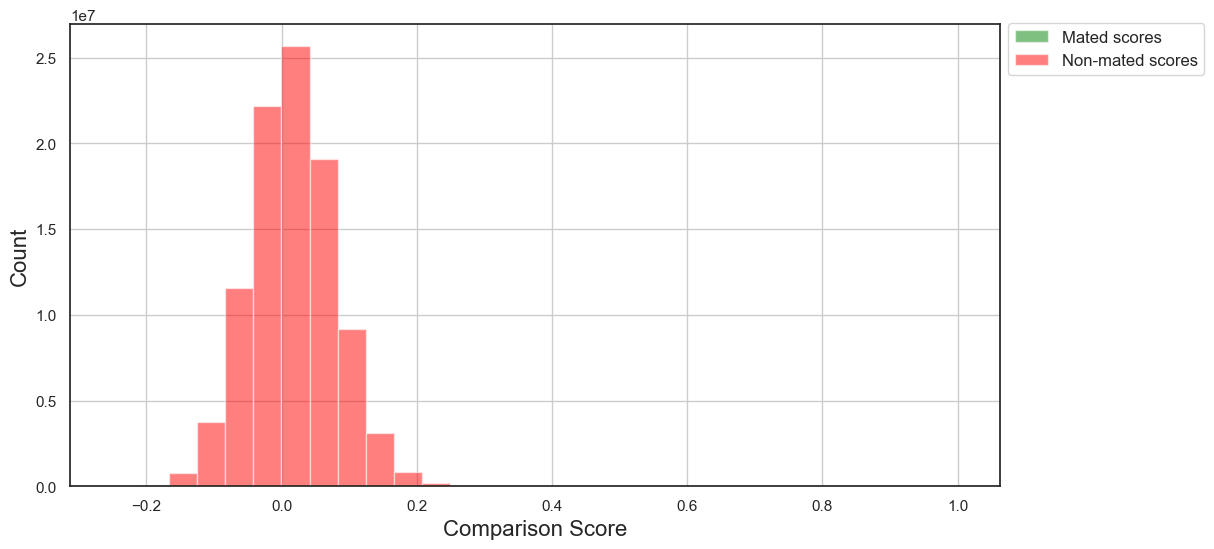

In [6]:
def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None):
    def normalise_scores(distribution):
        return np.ones_like(distribution) / len(distribution)
    plt.figure(figsize=figure_size)
    if normalise:
        plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color=mated_colour, alpha=0.5, label=mated_label)
        plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color=nonmated_colour, alpha=0.5, label=nonmated_label)
        xlabel = "Probability Density"
    else:
        plt.hist(mated_scores, bins=50, color=mated_colour, alpha=0.5, label=mated_label)
        plt.hist(nonmated_scores, bins=30, color=nonmated_colour, alpha=0.5, label=nonmated_label)
        xlabel = "Count"
    plt.xlabel("Comparison Score", size=label_fontsize)
    plt.ylabel(xlabel, size=label_fontsize)
    plt.grid(True)
    plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)
    
    if savename is not None:
        plt.savefig(savename, bbox_inches="tight")
        plt.cla()
        plt.clf()
        plt.close()
    else:
        plt.show()
    
plot_histogram(mated_scores1, nonmated_scores1, normalise=True)

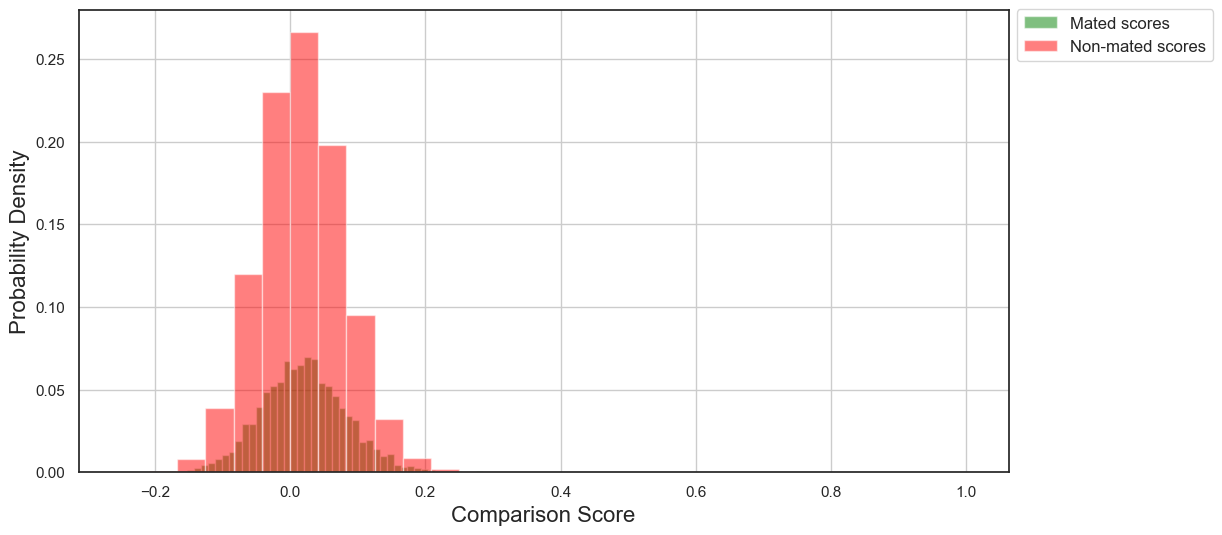

In [7]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True)

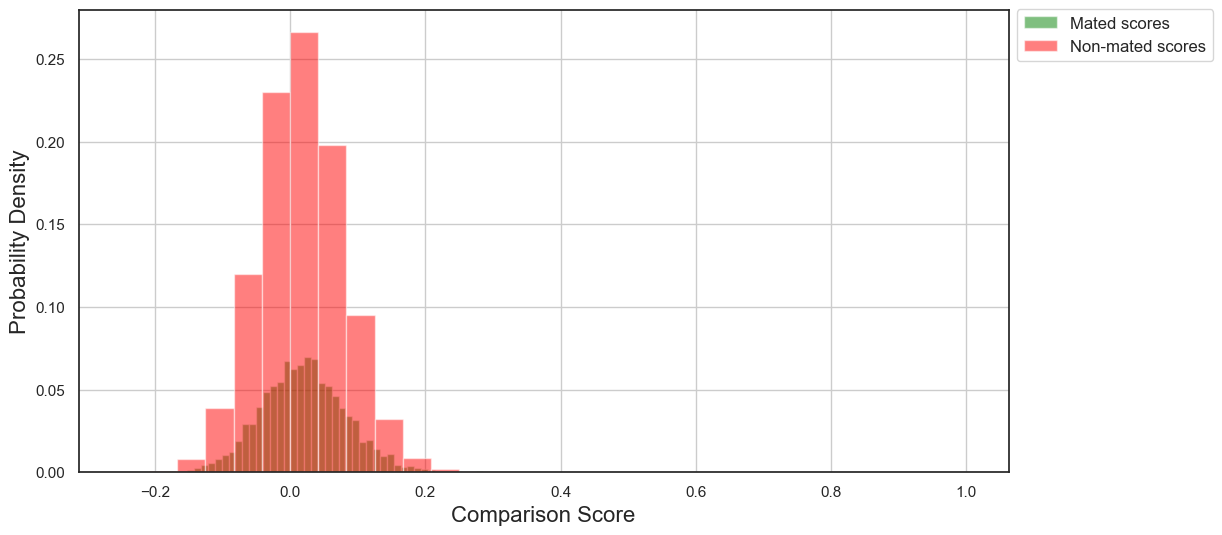

In [ ]:
plot_histogram(mated_scores3, nonmated_scores3, normalise=True)

In [ ]:
plot_histogram(mated_scores4, nonmated_scores4, normalise=True)

In [ ]:
plot_histogram(mated_scores5, nonmated_scores5, normalise=True)

In [ ]:
plot_histogram(mated_scores6, nonmated_scores6, normalise=True)

In [13]:
def get_kde(distribution, linspace_items=101):
    dist_min, dist_max = distribution.min(), distribution.max()
    dist_kde = gaussian_kde(distribution)
    dist_pos = np.linspace(dist_min, dist_max, linspace_items)
    return dist_kde, dist_pos, dist_min, dist_max

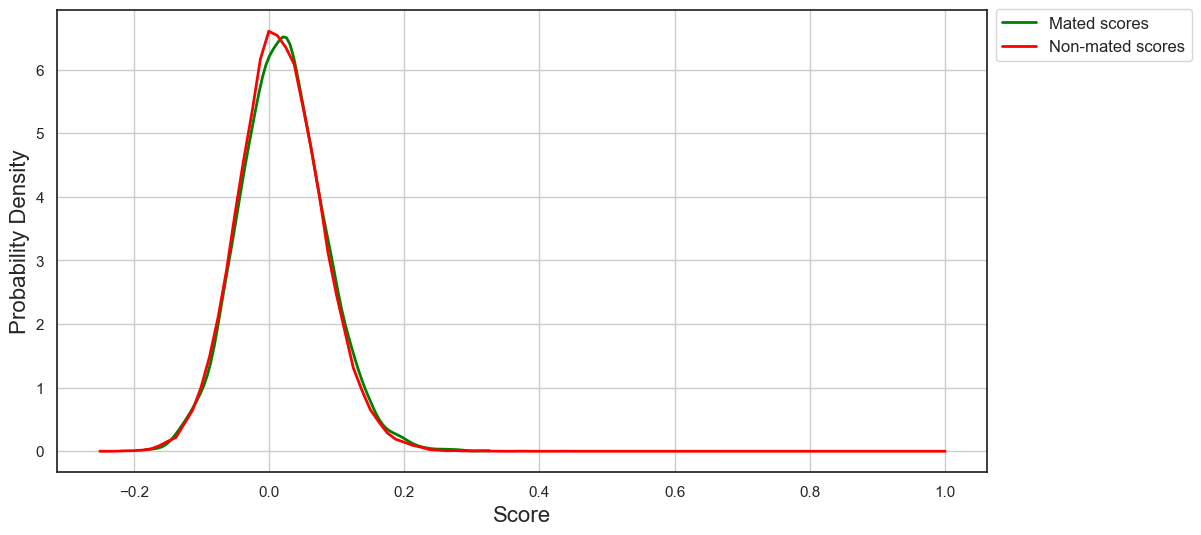

In [9]:
mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores1)
nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores1)
plt.figure(figsize=figure_size)
plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)
plt.xlabel("Score", size=label_fontsize)
plt.ylabel("Probability Density", size=label_fontsize)
plt.grid(True)
plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)
plt.show()

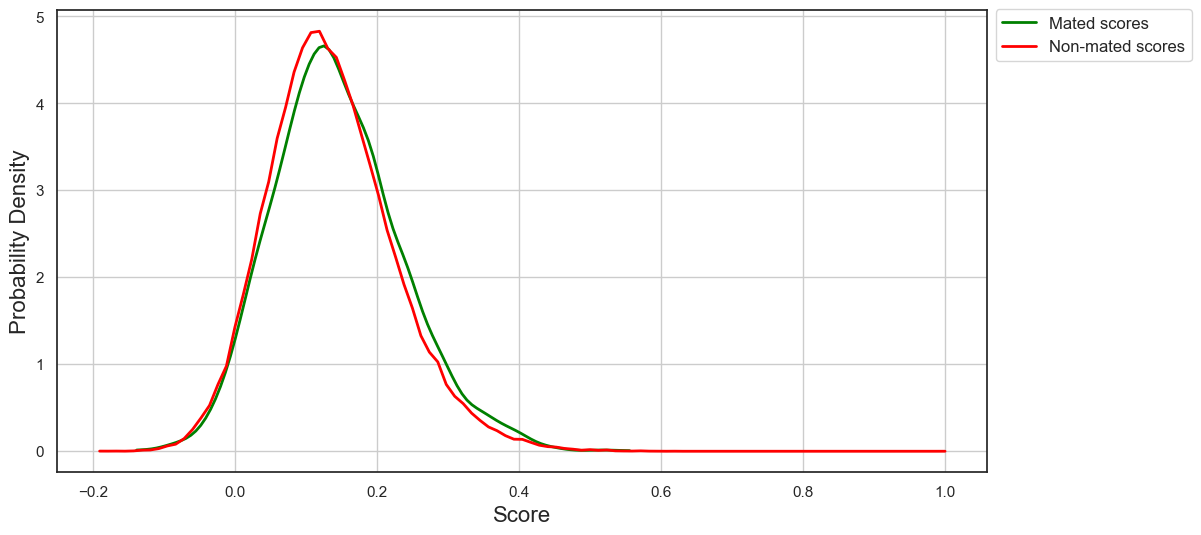

In [14]:
mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores2)
nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores2)
plt.figure(figsize=figure_size)
plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)
plt.xlabel("Score", size=label_fontsize)
plt.ylabel("Probability Density", size=label_fontsize)
plt.grid(True)
plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)
plt.show()

In [11]:
def d_prime(distribution1, distribution2):
    mean1, mean2 = np.mean(distribution1), np.mean(distribution2)
    std1, std2 = np.std(distribution1), np.std(distribution2)
    return abs(mean1 - mean2) / math.sqrt(0.5 * (std1 ** 2 + std2 ** 2))

d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
d_prime_system3 = d_prime(mated_scores3, nonmated_scores3)
d_prime_system4 = d_prime(mated_scores4, nonmated_scores4)
d_prime_system5 = d_prime(mated_scores5, nonmated_scores5)
d_prime_system6 = d_prime(mated_scores6, nonmated_scores6)
for system_number, d_prime_value in enumerate([d_prime_system1, d_prime_system2, d_prime_system3, d_prime_system4, d_prime_system5, d_prime_system6], start=1):
    print(f"System {system_number} d' = {round(d_prime_value, round_digits)}")

System 1 d' = 0.05221
System 2 d' = 0.10935
System 3 d' = 0.03133
System 4 d' = 0.02149
System 5 d' = 0.05811
System 6 d' = 0.07843


## DET curves
A detection error tradeoff curve allows to plot the entire spectrum of operating points (error rates), i.e. the false rejection rate vs. false acceptance rate. It is used in standardised evaluation of biometric systems (as mandated by the international standard [ISO/IEC 19795-1:2006 Information technology -- Biometric performance testing and reporting -- Part 1: Principles and framework](https://www.iso.org/standard/41447.html).

In [15]:
def adjust_scores_for_DET(scores_array, scores_type):
    scores_array = np.asarray(scores_array)
    if scores_type == "similarity":
        return scores_array
    elif scores_type == "dissimilarity":
        return -scores_array
    else:
        raise ValueError(f"Unknown type of comparison scores: {scores_type}")

In [16]:
det = DET(biometric_evaluation_type='algorithm', abbreviate_axes=True, plot_eer_line=True, plot_title="System DET Scores")
det.x_limits = np.array([1e-4, .99])
det.y_limits = np.array([1e-4, .99])
det.x_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 60e-2, 80e-2, 99e-2])
det.x_ticklabels = np.array(['0.1', '1', '5', '20', '40', '60', '80', '99'])
det.y_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 60e-2, 80e-2, 99e-2])
det.y_ticklabels = np.array(['0.1', '1', '5', '20', '40', '60', '80', '99'])
det.create_figure()
det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
det.plot(tar=adjust_scores_for_DET(mated_scores3, scores_type3), non=adjust_scores_for_DET(nonmated_scores3, scores_type3), label=system_name3)
det.plot(tar=adjust_scores_for_DET(mated_scores4, scores_type4), non=adjust_scores_for_DET(nonmated_scores4, scores_type4), label=system_name4)
det.plot(tar=adjust_scores_for_DET(mated_scores5, scores_type5), non=adjust_scores_for_DET(nonmated_scores5, scores_type5), label=system_name5)
det.plot(tar=adjust_scores_for_DET(mated_scores6, scores_type6), non=adjust_scores_for_DET(nonmated_scores6, scores_type6), label=system_name6)
det.legend_on(loc="upper right")
det.show()